

# Project 4 - Predicting a Continuous Target with Regression (Titanic)
**Author:** AARON 
**Date:** November 22, 2025 
**Objective:** G



## Introduction
- Using the 


## Section 1. Import and Inspect the Data
 

### 1.1 Include Imports

In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### 1.2 Load the dataset and display basic information

In [125]:


# Load the insurance dataset 
df = pd.read_csv("insurance.csv")

# Display structure and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1.3 Check for missing values and display summary statistics

In [126]:
# Check for missing values using the isnull() method and then the sum() method. 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [127]:
# Display summary statistics using the describe() method

print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Reflection 1: 
What do you notice about the dataset? The dataset is fully populated with 1338 records.
Are there any data issues?  There were no missing values.

## Section 2. Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions

Map Smoker and Sex attributes to numeric numbers.
Use one hop encoding for regions.

In [128]:

# Map Smoker and Sex attributes to numeric numbers.
df['smoker_e'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex_e'] = df['sex'].map({'female': 1, 'male': 0})

# Use one hop encoding for regions.
df = pd.get_dummies(df, columns=['region'], dtype=int)

In [129]:
# Display summary statistics using the describe() method
print(df.describe())

               age          bmi     children       charges     smoker_e  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025    30.663397     1.094918  13270.422265     0.204783   
std      14.049960     6.098187     1.205493  12110.011237     0.403694   
min      18.000000    15.960000     0.000000   1121.873900     0.000000   
25%      27.000000    26.296250     0.000000   4740.287150     0.000000   
50%      39.000000    30.400000     1.000000   9382.033000     0.000000   
75%      51.000000    34.693750     2.000000  16639.912515     0.000000   
max      64.000000    53.130000     5.000000  63770.428010     1.000000   

             sex_e  region_northeast  region_northwest  region_southeast  \
count  1338.000000       1338.000000       1338.000000       1338.000000   
mean      0.494768          0.242152          0.242900          0.272048   
std       0.500160          0.428546          0.428995          0.445181   
min       0.000000  

In [130]:
# Check for correlations using the corr() method and tell it to use only the numeric features. 
print(df.corr(numeric_only=True))

                       age       bmi  children   charges  smoker_e     sex_e  \
age               1.000000  0.109272  0.042469  0.299008 -0.025019  0.020856   
bmi               0.109272  1.000000  0.012759  0.198341  0.003750 -0.046371   
children          0.042469  0.012759  1.000000  0.067998  0.007673 -0.017163   
charges           0.299008  0.198341  0.067998  1.000000  0.787251 -0.057292   
smoker_e         -0.025019  0.003750  0.007673  0.787251  1.000000 -0.076185   
sex_e             0.020856 -0.046371 -0.017163 -0.057292 -0.076185  1.000000   
region_northeast  0.002475 -0.138156 -0.022808  0.006349  0.002811  0.002425   
region_northwest -0.000407 -0.135996  0.024806 -0.039905 -0.036945  0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982  0.068498 -0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210 -0.036945  0.004184   

                  region_northeast  region_northwest  region_southeast  \
age                       0.002475         -0

In [131]:
# Check for missing values using the isnull() method and then the sum() method. 
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
smoker_e            0
sex_e               0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

### 2.2 Feature Engineering

Create a variable that adds twice BMI with age.

In [ ]:
# Create numeric variable for age and twice bmi
df['bmi_age'] = df['age'] + 2 * df['bmi'] 



## Section 3. Feature Selection and Justification
### 3.1 Choose features and target



Case 1: 
input features: "age", "bmi", "children", "charges", "smoker_e", "sex_e", "region_northeast", "region_northwest", "region_southeast", "region_southwest" 
target: "charges"




### 3.2 Define X and y

Assign input features to X a pandas DataFrame with 1 or more input features
Assign target variable to y (as applicable) - a pandas Series with a single target feature

In [133]:
# Define input features (X) and target (y) 
# All numberic features in the data frame.  Also don't inlude "bmi_age".
# Target: charges 

X1 = df.drop(columns=["charges", "sex", "smoker", "bmi_age"])  # Features
y1 = df["charges"]  # Target


In [134]:
# X1 Inputes 
X1.head()

,age,bmi,children,smoker_e,sex_e,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,1,0,0,0,1
1,18,33.770,1,0,0,0,0,1,0
2,28,33.000,3,0,0,0,0,1,0
3,33,22.705,0,0,0,0,1,0,0
4,32,28.880,0,0,0,0,1,0,0


### Reflection 2 and 3:
- This data set just had a handful of inputs to choose from.  I elected to combine age and bmi to amplify their combined effect.  However after running the models in the next section I found this combined field did not do any better than just keeping these parameters separate.
- I also decided to include all inputs and that did give the best results as seen below.

## Section 4. Train a Regression Model (Linear Regression)
 

Split the data into training and test sets.

### 4.1 Split the Data

In [135]:

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)



### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)
Create and train all 4 cases.

In [136]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)


# Predictions

y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)



### 4.3 Evaluate Model Performance

In [137]:
print("Case 1: Training R²:", r2_score(y1_train, y1_pred_train))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y1_pred_test))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))



Case 1: Training R²: 0.7376151899509507
Case 1: Test R²: 0.8001744488359046
Case 1: Test RMSE: 30552437.41652549
Case 1: Test MAE: 4013.100618113485


ValueError: x and y must be the same size

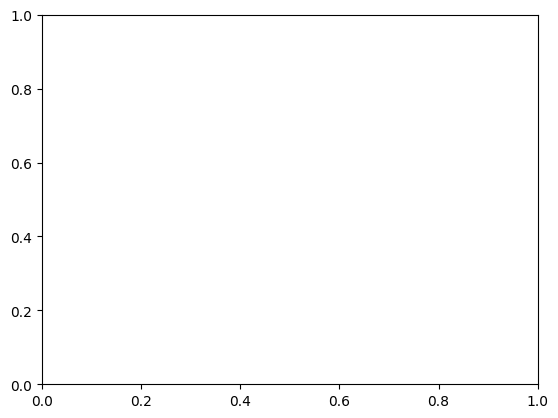

In [21]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y1_pred_test, color='red', label='Predicted (Linear)')
plt.legend()
plt.title("Linear Regression: Age vs Fare")
plt.show()

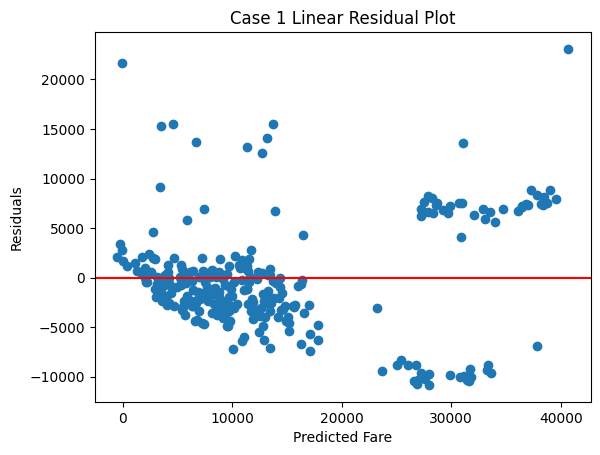

In [122]:
residuals = y1_test - y1_pred_test
plt.scatter(y1_pred_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Case 1 Linear Residual Plot")
plt.show()

In [240]:
print("Case 2: Training R²:", r2_score(y2_train, y2_pred_train))
print("Case 2: Test R²:", r2_score(y2_test, y2_pred_test))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y2_pred_test))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y2_pred_test))

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 1414.6244812277246
Case 2: Test MAE: 25.02534815941641


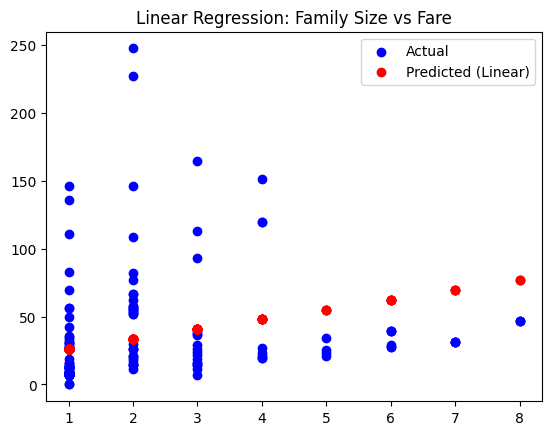

In [241]:
plt.scatter(X2_test, y2_test, color='blue', label='Actual')
plt.scatter(X2_test, y2_pred_test, color='red', label='Predicted (Linear)')
plt.legend()
plt.title("Linear Regression: Family Size vs Fare")
plt.show()

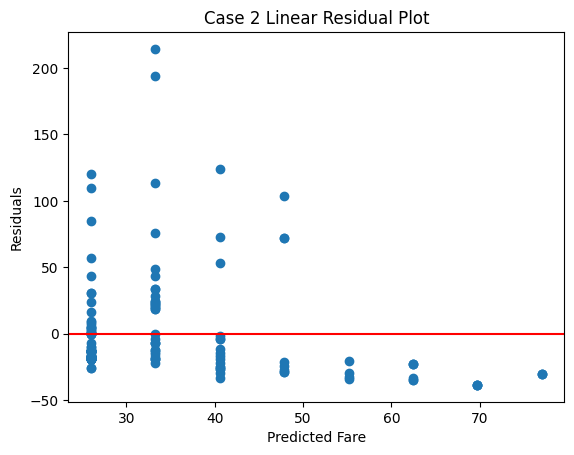

In [242]:
residuals = y2_test - y2_pred_test
plt.scatter(y2_pred_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Case 2 Linear Residual Plot")
plt.show()

In [243]:
print("Case 3: Training R²:", r2_score(y3_train, y3_pred_train))
print("Case 3: Test R²:", r2_score(y3_test, y3_pred_test))
print("Case 3: Test RMSE:", mean_squared_error(y3_test, y3_pred_test))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y3_pred_test))



Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 1374.7601875944658
Case 3: Test MAE: 24.284935030470688


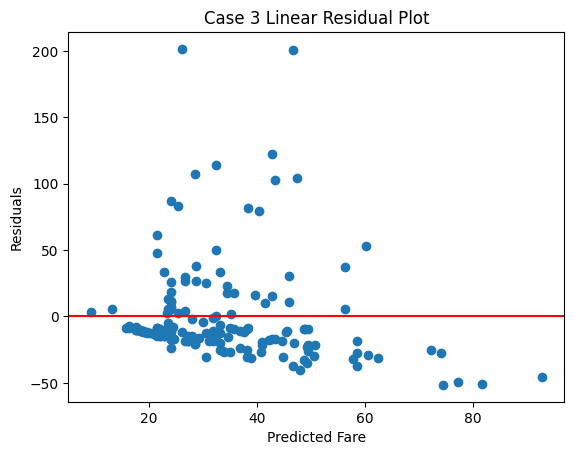

In [244]:
residuals = y3_test - y3_pred_test
plt.scatter(y3_pred_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Case 3 Linear Residual Plot")
plt.show()

In [245]:
print("Case 4: Training R²:", r2_score(y4_train, y4_pred_train))
print("Case 4: Test R²:", r2_score(y4_test, y4_pred_test))
print("Case 4: Test RMSE:", mean_squared_error(y4_test, y4_pred_test))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y4_pred_test))

Case 4: Training R²: 0.32930372730847557
Case 4: Test R²: 0.412862387766064
Case 4: Test RMSE: 849.4638285827654
Case 4: Test MAE: 19.767219512272867


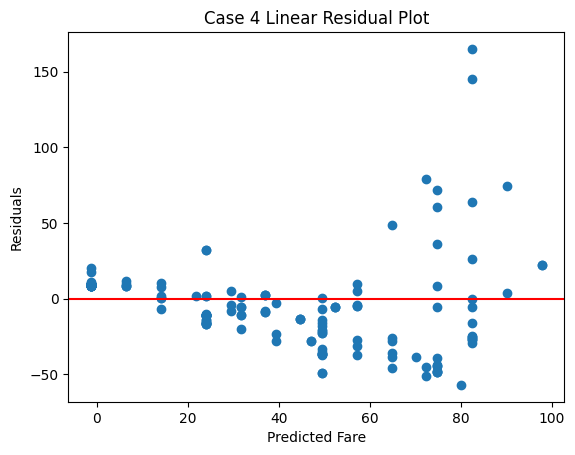

In [246]:
residuals = y4_test - y4_pred_test
plt.scatter(y4_pred_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Case 4 Linear Residual Plot")
plt.show()

Decision Tree Data

### Reflection 4:
Compare the train vs test results for each.


| Model Type    | Case   | Features Used                 | Training R² | Test R²   | RMSE    | MAE    | Notes |
|---------------|--------|-------------------------------|-------------|-----------|---------|--------|-------|
| Decision Tree | Case 1 | Age                           | 0.0099      | 0.0034    | 1441.84 | 25.28  | -     |
|               | Case 2 | Family Size                   | 0.0499      | 0.0222    | 1414.62 | 25.02  | -     |
|               | Case 3 | Age, Family Size              | 0.0734      | 0.0497    | 1374.76 | 24.28  | -     |
|               | Case 4 | Family Size, Survived, Class  | 0.3293      | 0.4128    | 849.46  | 19.76  | -     |


- Did Case 1 overfit or underfit? Explain:  Case 1 is an underfit.  R2 are very low.
- Did Case 2 overfit or underfit? Explain:  Case 2 is an underfit.  The is a small improvement, but R2 are very low.
- Did Case 3 overfit or underfit? Explain:  Case 3 is an underfit.  The is a small improvement, R2 are very low.
- Did Case 4 overfit or underfit? Explain:  Case 4 is not overfit or underfit.  It's odd that the test set did better, but that does not mean it's overfit.

### Adding Age

- Did adding age improve the model: The model improved slightly from Case 2 to Case 3.
- Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that):  I think age coupled with family size would improve where an entry was a child who was part of a family.  The fare price for the family would account for that.

### Worst

- Which case performed the worst: Case 1 - Age
- How do you know: The R2 value was almost 0.
- Do you think adding more training data would improve it (and why/why not):  I don't think adding more training data would help.  Age does not make a meaningful impact.

### Best

- Which case performed the best: Case 4 - Family Size, Class + Survived
- How do you know: The R2 was 10 times better. and the RMSE and MAE we noticeable lower.
- Do you think adding more training data would improve it (and why/why not):  I'm not sure.  In my case the test set performed better than the training set.  So it makes me think I had a good split or I maxed out any training data.

## Section 5. Compare Alternative Models



### 5.1 Ridge Regression (L2 penalty)

In [108]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X1_train, y1_train)
y_pred_ridge = ridge_model.predict(X1_test)


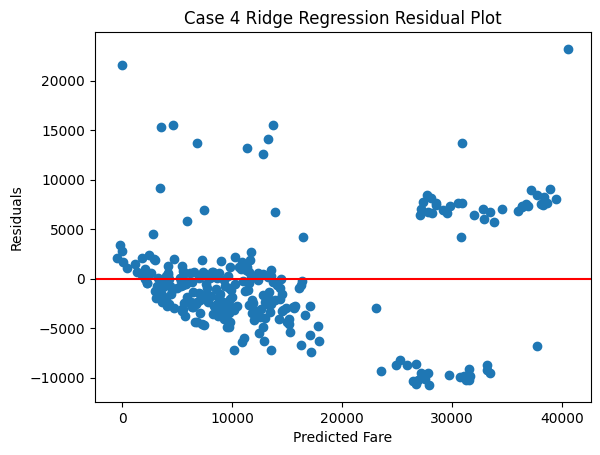

In [110]:
residuals = y1_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Case 4 Ridge Regression Residual Plot")
plt.show()

### 5.2 Elastic Net (L1 + L2 combined)

In [111]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X1_train, y1_train)
y_pred_elastic = elastic_model.predict(X1_test)

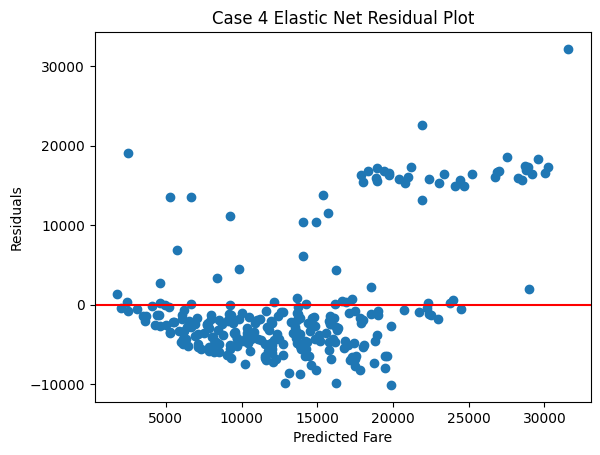

In [112]:
residuals = y1_test - y_pred_elastic
plt.scatter(y_pred_elastic, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Case 4 Elastic Net Residual Plot")
plt.show()

### 5.3 Polynomial Regression

In [113]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

In [115]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
ycase1_pred_poly = poly_model.predict(X_test_poly)

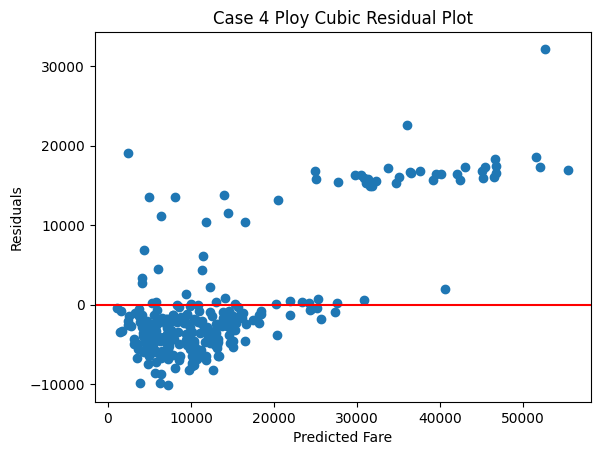

In [116]:
residuals = y1_test - y_pred_elastic
plt.scatter(ycase1_pred_poly, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Case 4 Ploy Cubic Residual Plot")
plt.show()

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

In [ ]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

In [117]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
ycubic_pred_poly = poly_model.predict(X_test_poly)

In [121]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Polynomial Cubic Case 2", y1_test, ycubic_pred_poly)

Polynomial Cubic Case 2 R²: 0.888
Polynomial Cubic Case 2 RMSE: 17093508.34
Polynomial Cubic Case 2 MAE: 2772.78



### 5.4 Reflections (in a Markdown cell):
- What patterns does the cubic model seem to capture:  For smaller family sizes it predicted lower fare values.
- Where does it perform well or poorly:  It does a little better than a straight linear line does when the family size is bigger.
- Did the polynomial fit outperform linear regression: Yes the R2 value 0.088 for poly but 0.022 for Linear.
- Where (on the graph or among which kinds of data points) does it fit best:  The prediction is best for two family members.  Followed by alone and then three family members.

| Model Type    | Case   | Features Used                 | Test R²   | RMSE    | MAE    | Notes |
|---------------|--------|-------------------------------|-----------|---------|--------|-------|
| Linear        | Case 2 | Family Size                   | 0.022    | 1414.62 | 25.02  | -     |
| Poly Cubic    | Case 2 | Family Size                   | 0.088     | 1319.24 | 24.07  | -     |

### 5.4 Compare All Models

In [120]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear Case 4", y1_test, y1_pred_test)
report("Ridge Case 4", y1_test, y_pred_ridge)
report("ElasticNet Case 4", y1_test, y_pred_elastic)
report("Polynomial Cubic Case 4", y1_test, ycase1_pred_poly)


Linear Case 4 R²: 0.800
Linear Case 4 RMSE: 30552437.42
Linear Case 4 MAE: 4013.10

Ridge Case 4 R²: 0.800
Ridge Case 4 RMSE: 30632410.86
Ridge Case 4 MAE: 4025.35

ElasticNet Case 4 R²: 0.610
ElasticNet Case 4 RMSE: 59577764.02
ElasticNet Case 4 MAE: 5621.09

Polynomial Cubic Case 4 R²: 0.888
Polynomial Cubic Case 4 RMSE: 17093508.34
Polynomial Cubic Case 4 MAE: 2772.78



| Model Type      | Case   | Features Used                 | Test R²  | RMSE   | MAE    | Notes |
|-----------------|--------|-------------------------------|----------|--------|--------|-------|
| Linear          | Case 4 | Family Size, Class + Survived | 0.413    | 849.46 | 19.77  | -     |
| Ridge Case      | Case 4 | Family Size, Class + Survived | 0.413    | 849.11 | 19.75  | -     |
| ElasticNet      | Case 4 | Family Size, Class + Survived | 0.429    | 825.78 | 18.18  | -     |
| Polynomial Cubic| Case 4 | Family Size, Class + Survived | 0.469    | 768.20 | 15.49  | -     |
| Polynomial Cubic| Case 2 | Family Size                   | 0.088    | 1319.24| 24.07  | -     |
| Poly 5th Order  | Case 2 | Family Size                   | 0.065    | 1352.24| 24.34  | -     |


### Cubic vs 5th Order Polynomial Comparison 

- The 5th order Polynomial underperforms the cubic Polynominal model because it shows as almost a straight line for the first six family number values.  It is almost linear for those first six feature points.  The last two feature points it dropped aggressively which did not really help the prediction.  
- Although the Cubic Polynomial was not great, it did better than linear and the 5th order.  The main reason is seen by the prediction line bending after feature point three instead of a steady slope up which does not correspond to the actual outcomes.


## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings


- What features were most useful?  The engineered feature class and survival had the largest positive effect on predicting fare.

- What regression model performed best?  The Polynomial Cubic Model iterated on Case 4 had the best metrics. Yet, I don't think it is the best model.  I had a hard time visualizing these models.  I added a "residuals" graphic to each of Case 4 models.  
- The goal is to have it evenly distributed around 0 all the way through the range with as little amplitude as possible.
- The first three models had that characteristic for 2/3 of the range and then started having higher amplitudes at the larger fare values.
However, the Polynomial Cubic Model had only three areas with very high amplitude.  This leads me to believe that it has overfitted the training data and that Ridge or ElasticNet should be used. 

- How did model complexity or regularization affect results?  I think regularization had some positive effect, but it was pretty minor.  I was a little disappointed Ridge and ElasticNet did not have a higher impact.  I suspect the input features would need to be adjusted for more of a step function change.
  
- Further Discussion:  I chose to combine class and survived as a engineered feature.  After doing some more reading that may have a causality type effect.  I'll need to keep an eye out for this in the future, but I feel like the use of both here enhanced the prediction without causing a causality type effect.

### 6.2 Discuss Challenges
- Was fare hard to predict? Why?  Fare was hard to predict with the given inputs.  There was a very low R2 value for Age, Family Size, and even for Age and Family Size engineered parameter.  Class really is what helped the models perform up to 10 times better when coupled with Family Size. 

- Did skew or outliers impact the models?  Outliers had a decided effect on the models.  A few points were so high with no real basis in the features used in the models.